# Support vector machine

SVM is the combination of Hinge Loss and Kernel method. Let's understand this two technique first.

## <center> Hinge Loss

### Binary Classification

Let's go back to Binary classification.

**step1: function set**

A function $g$ can be used in Binary classification will take the output of a function $f$ as input.

* if $f(x) > 0$, x is data in here, $g(f(x)) = +1$
* if $f(x) < 0$,  $g(f(x)) = -1$

**step2: Loss function**

we often use accuracy to evaluate the performance in classification.

That is $Loss = \sum_n \delta(g(x^n) \ne \hat{y^n})$ but the problem is it cannot do derivative calculation. Then no step3...

Hence we need to find other Loss function to replace $\delta$. $Loss = \sum_n l(f(x^n), \hat{y^n})$

**Step3: training use gradient descent**

### suitable loss function

To compare differnet loss function, we use $\hat {y^n}f(x)$ as x axis, loss value as our y axis.



recall our function set in Binary Classification

$$
g(f(x), \hat{y^n}) =
  \begin{cases}
   +1 & \text{if } f(x) > 0 \\
   -1 & \text{if } f(x) < 0 
  \end{cases}
$$

obviously, we make a great prediction if $\hat {y^n}f(x)$ greater than 1 

* ideal loss function(exist, but is not differentiable)

* square loss, 
$$
Loss(f(x), \hat{y^n}) = (\hat{y^n}f(x^n) - 1)^2 = \begin{cases}
                                        (f(x^n) - 1)^2 & \text{if } \hat{y^n} = 1  \text{, hope } f(x^n) \text{ close to 1}\\
                                        (f(x^n) + 1)^2 & \text{if } \hat{y^n} = -1 \text{, hope } f(x^n) \text{ close to -1}
                                    \end{cases}
$$

* Sigmoid + Square loss
$$
Loss(f(x), \hat{y^n}) = (\sigma(\hat{y^n}f(x^n)) - 1)^2 = \begin{cases}
                                        (\sigma(f(x^n)) - 1)^2 & \text{if } \hat{y^n} = 1 \text{, hope } f(x^n) \text{ close to }\infty\\
                                        (\sigma(f(x^n)))^2 & \text{if } \hat{y^n} = -1\text{, hope } f(x^n) \text{ close to }-\infty
                                    \end{cases}
$$

* sigmoid + cross entropy(often use)
$$
Loss(f(x), \hat{y^n}) = \ln(1 + exp(-\hat{y^n}f(x))) = \begin{cases}
                                        \ln(1 + exp(-f(x))) & \text{if } \hat{y^n} = 1 \text{, hope } f(x^n) \text{ close to }\infty\\
                                        \ln(1 + exp(f(x)))& \text{if } \hat{y^n} = -1\text{, hope } f(x^n) \text{ close to }-\infty
                                    \end{cases}
$$

* Hinge (revised cross entropy)
$$
Loss(f(x), \hat{y^n}) = max(0, 1-\hat{y^n}f(x))) = \begin{cases}
                                       max(0, 1-f(x))) & \text{if } \hat{y^n} = 1 \text{, hope } f(x^n) \text{ larger than }1\\
                                       max(0, 1+f(x)))& \text{if } \hat{y^n} = -1\text{, hope } f(x^n) \text{ less than }-1                                    
                                    \end{cases}
$$ 
$$

Let's plot them and anaylse

In [37]:
from matplotlib import pyplot as plt
from matplotlib import spines
import numpy as np

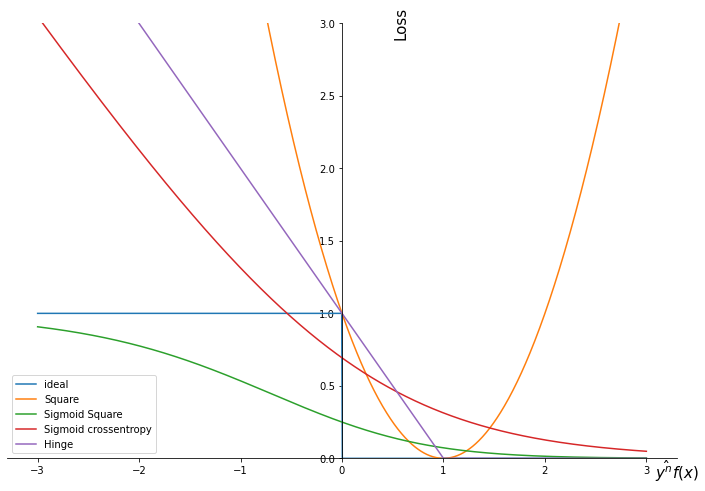

In [100]:
x = np.linspace(-3, 3, 1000)

y_idea = (x<0).astype(int)
y_square = np.square(x - 1)
y_sigmoid_sqaure = np.square( 1 / (1 + np.exp(-x)) - 1)
y_sigmoid_crossentropy = np.log(1 + np.exp(-x))
y_hinge =  [1-e if e < 1 else 0 for e in x]

fig, ax= plt.subplots(figsize=(12, 8))

#spine placement data centered
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_ylim(0, 3)
ax.set_xlabel('$\hat {y^n}f(x)$', fontsize=15)
ax.xaxis.set_label_coords(1.0, 0.0)

ax.set_ylabel('Loss', fontsize=15)
ax.yaxis.set_label_coords(0.6, 1.0)



ax.plot(x, y_idea, label = 'ideal')
ax.plot(x, y_square, label = 'Square')
ax.plot(x, y_sigmoid_sqaure, label = 'Sigmoid Square')
ax.plot(x, y_sigmoid_crossentropy, label = 'Sigmoid crossentropy')
ax.plot(x, y_hinge, label = 'Hinge')

ax.legend()

plt.show()

From the above plot we can clearly know pros and cons of these loss function

* Square Loss:  Unreasonable. loss increase when $\hat {y^n}f(x) > 1$

* Sigmoid Square: loss decrease slowly

* sigmoid crossentropy: cannot get quite great performance because it will still increase $\hat {y^n}f(x)$ even if it is greater than 1.

* Hinge: nice! It is enought if $\hat {y^n}f(x) > 1$,hence it don't need to care these value but focus on those data has loss less than 1.

## <center> Linear SVM

### introduction

**step 1: Function set**

$f(x) = \sum_i w_i x_i + b = \begin{bmatrix}  w \\ b  \end{bmatrix} \cdot \begin{bmatrix} x \\ 1 \end{bmatrix} = W^T \cdot X$

**step 2: Loss function(Hinge loss)**

$L(f) = \sum_n l(f(x^n), \hat{y^n}) + \lambda||w||_2=  max(0, 1-\hat{y^n}f(x)))+ \lambda||w||_2$

convex function: if $f$ is a convex function, then $f(\lambda x_1 + (1-\lambda) x_2) \le \lambda f(x_1) + (1-\lambda) x_2$, where $0 < \lambda < 1$

property: hinge loss is a convex function, L2 norm is also a convex function. 

Convex function is closed under composition.

whatever the initialisation, you will come to global minimum at the end...

**step 3: how to find , gradient descent**

$$
w_i = w_{i-1} - \eta \sum_n -\delta(\hat{y^n}f(x^n) < 1)x_i^n
$$


### Another formulation of loss function

$$
L(f) = \sum \epsilon ^ n + \lambda ||w||_2
$$

### Support Vector

Look at the weight update, if the initial weight is 0, then we can see w as a linear combination of all data point(x).

$$
w = \sum_n a_nx^n
$$

For those data we predict true results, $-\delta(\hat{y^n}f(x^n) < 1) = 0$, then $a_n = 0$.

Generally, most of $a_n$ is 0, which means $W$ is sparse (has less parameters). This could make your model more robust(avoid overfitting)

## <center> kernel method

### introduction

go back to our training process

**step 1:**

$f(x) = W^T x = a^T X^T x = \sum_n a_n (x^n \cdot x) = \sum_n a_n K(x^n, x)$, where $K(x^n, x) = (x^n \cdot x)$

**step 2,3:**

find $[a_1, a_2,..., a_n]$ to minimise loss function

let's look at our new loss function but substitute $f(x)$ with formula in step 1(omit regularization for convenience)

$$
L(f) = \sum_n l(f(x^n), \hat{y^n}) = \sum_n l(\sum_{n'} a_{n'} K(x^{n'}, x), \hat{y^n})
$$

You can find that we not really need to know $x^n$ and $x$, the inner product of them is enough to compute our loss function.



### kernel trick

**what is kernel trick**

Kernel trick could speed up your training.

**How**

Let's see an example. If we define $x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$ and  $\phi(x) = \begin{bmatrix}
   x_1^2 \\
   \sqrt{2} x_1 x_2 \\
    x_2^2
  \end{bmatrix}$ as transformation function.

We want to compute the inner product of two data after transformation.

That is $K(x, y) = \phi(x) \cdot \phi(y) = ... = (x_1y_1 + x_2y_2)^2 = (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \cdot \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} )^2 = (x \cdot y)^2$

It is really superise because the inner product of two data after transformation is equal to the inner product of two data in original space

Sometimes the transformation might be really long or even to a infinite space. Kernel method could solve this problem if we find the kernel function for specific transformation.